## Summary

We have coded the text as Bag of Words and applied an GradientBoosting and RandomForestClassifier models. We have built a pipeline to check different hyperparameters using cross-validation. At the end, we have obtained a good model which achieve an AUC of **0.92** 

## Data loading and cleaning

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize
%matplotlib inline

# basic packages
from itertools import cycle

# sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from matplotlib import colors as mcolors
from matplotlib import colors
#cnames = dict((k, v) for k, v in cnames.items() if 'dark' in k) # get only dark colors
cnames = {k: colors.cnames[k] for k in ['red', 'green', 'blue', 'black', 'yellow', 'purple', 'brown']}


%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier


Bad key "text.kerning_factor" on line 4 in
C:\Users\marcp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


ModuleNotFoundError: No module named 'catboost'

In [18]:
def is_numeric(x):
  """Check whether an object is numeric."""
  try:
    x+0
    return True
  except:
    return False

col_names = ['Topic0','Topic1','Topic2','Topic3','p1','p2','p3','p4','p5','p6','Label']
#col_names = ['Topic0','Topic1','Topic2','Topic3','Label']
# Load Data
#data = pd.read_csv('/Users/Marco/Documents/MATLAB/Fraud_Triangle_Final_v4.csv', encoding='latin1', low_memory=False)
#data1 = pd.read_csv('/Users/marcp/OneDrive - Escuela Politécnica Nacional/2019A/Investigacion/Corpus/DataSet/Triangulo Fraude/experimentacion2/corex/Comparativa Datasets/Students_topic3.csv', encoding='latin1', low_memory=False, skiprows=1, names=col_names)
#data = pd.read_csv('/Users/marcp/OneDrive - Escuela Politécnica Nacional/2019A/Investigacion/Corpus/DataSet/Triangulo Fraude/Classifier-analysis_new_dataset_3_def_addcol.csv', encoding='latin1', low_memory=False, skiprows=1, names=col_names)
data = pd.read_csv('/Users/marcp/OneDrive - Escuela Politécnica Nacional/2019A/Investigacion/Corpus/DataSet/Triangulo Fraude/experimentacion2/Comparativa Datasets/Syntetic_AllTopics.csv', encoding='latin1', low_memory=False, skiprows=1, names=col_names)
#data = pd.read_csv('/Users/marcp/OneDrive - Escuela Politécnica Nacional/Documentos/MATLAB/Fraud_Triangle_Final_v5.csv', encoding='latin1', low_memory=False)
#data = pd.read_csv('/Users/marcp/OneDrive - Escuela Politécnica Nacional/Documentos/MATLAB/Fraud_Triangle_Final_v2.csv', encoding='latin1', low_memory=False)



In [19]:
print (data.shape)
#print (data1.shape)
print (data.columns.values)

(14111, 11)
['Topic0' 'Topic1' 'Topic2' 'Topic3' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'Label']


## Machine Learning Model

We split the data into training and testing set:

In [20]:
#X = data[['Topic0', 'Topic1','Topic2','Topic3']].values
X = data[['Topic0', 'Topic1','Topic2','Topic3','p1','p2','p3','p4','p5','p6']].values
y = data['Label'].values
#X1 = data1[['Topic0', 'Topic1','Topic2','Topic3']].values
#X1 = data1[['Topic0', 'Topic1','Topic2','Topic3','p1','p2','p3','p4','p5','p6']].values
#y1 = data1['Label'].values
#display(X.shape, y.shape)
#display(X1.shape, y1.shape)



In [21]:
import sys
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
np.set_printoptions(threshold=sys.maxsize)
#print(X_test)
display(X_test.shape)
#print(X1)


(11288, 10)

(11288,)

(2823, 10)

(2823,)

(2823, 10)

In [352]:
X1_test = np.concatenate((X_test, X1))
X_test=X1_test
display(X_test.shape)
print (X_test)

(9653, 4)

[[0.29 0.   0.05 0.66]
 [0.02 0.   0.31 0.67]
 [0.13 0.   0.01 0.86]
 [0.16 0.3  0.04 0.5 ]
 [0.05 0.   0.   0.95]
 [0.01 0.   0.36 0.63]
 [0.1  0.   0.   0.89]
 [0.29 0.   0.14 0.56]
 [0.01 0.   0.26 0.72]
 [0.   0.   0.17 0.83]
 [0.03 0.   0.4  0.57]
 [0.34 0.   0.06 0.6 ]
 [0.02 0.   0.32 0.66]
 [0.2  0.04 0.37 0.39]
 [0.08 0.   0.01 0.91]
 [0.   0.   0.   1.  ]
 [0.03 0.   0.31 0.66]
 [0.04 0.   0.46 0.5 ]
 [0.14 0.   0.01 0.86]
 [0.   0.15 0.29 0.57]
 [0.   0.   0.46 0.54]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.42 0.   0.   0.58]
 [0.   0.   0.35 0.65]
 [0.11 0.   0.01 0.88]
 [0.34 0.   0.18 0.49]
 [0.24 0.   0.28 0.48]
 [0.09 0.27 0.04 0.6 ]
 [0.   0.35 0.   0.65]
 [0.16 0.   0.01 0.83]
 [0.36 0.   0.27 0.37]
 [0.   0.   0.   1.  ]
 [0.26 0.   0.16 0.57]
 [0.   0.   0.   1.  ]
 [0.49 0.   0.   0.51]
 [0.   0.   0.   1.  ]
 [0.   0.   0.13 0.87]
 [0.28 0.   0.   0.71]
 [0.29 0.   0.06 0.65]
 [0.   0.01 0.   0.99]
 [0.01 0.   0.44 0.55]
 [0.1  0.   0.32 0.58]
 [0.   0.06

In [353]:
y1_test = np.concatenate((y_test, y1))
y_test=y1_test
print (y_test)

[1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 

In [22]:
#logreg = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
gb_bench = GradientBoostingClassifier()
rf_bench = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# instantiate model
#logreg = LogisticRegression()
gb_bench.fit(X_train, y_train)
rf_bench.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [23]:
# make class predictions for the testing set
y_pred_class1 = gb_bench.predict(X_test)
y_pred_class2 = rf_bench.predict(X_test)

In [24]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class1))
print(metrics.accuracy_score(y_test, y_pred_class2))

0.7421183138505136
0.7445979454481049


In [25]:
# print the first 10 predicted probabilities for class 1
gb_bench.predict_proba(X_test)[0:10, 1]

array([0.05996477, 0.75140901, 0.60847066, 0.77125406, 0.20809141,
       0.1221557 , 0.12305413, 0.0510702 , 0.577927  , 0.55362404])

In [26]:
# store the predicted probabilities for class 1
y_pred_prob1 = gb_bench.predict_proba(X_test)
y_pred_prob2 = rf_bench.predict_proba(X_test)

In [27]:
roc_auc1 = metrics.roc_auc_score(y_test, y_pred_prob1[:,1])
roc_auc2 = metrics.roc_auc_score(y_test, y_pred_prob2[:,1])

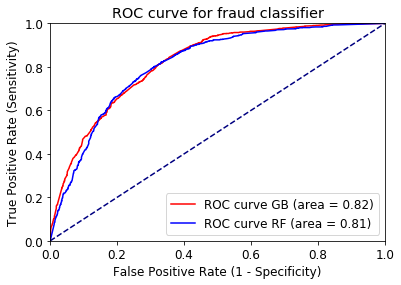

In [28]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred_prob1[:,1])
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_prob2[:,1])
plt.figure()
plt.plot(fpr1, tpr1, color='red', label='ROC curve GB (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', label='ROC curve RF (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()



In [17]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print("Sensitivity:  %.02f" % tpr[thresholds > threshold][-1])
    print('Specificity:  %.02f' % (1 - fpr[thresholds > threshold][-1]))

In [18]:
evaluate_threshold(0.5)

NameError: name 'tpr' is not defined

In [19]:
evaluate_threshold(0.4)

NameError: name 'tpr' is not defined

In [115]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob1[:,1]))
print(metrics.roc_auc_score(y_test, y_pred_prob2[:,1]))

0.8948633858176231
0.8766519476204497


In [116]:
# calculate cross-validated AUC
cross_val_score(gb_bench, X, y, cv=10, scoring='roc_auc').mean()
cross_val_score(gb_bench, X, y, cv=10, scoring='roc_auc').mean()

0.9030075962794541